# Linear Regression Example

#### Our first example uses an artificial dataset with a single feature

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_size = 10000
steps = 1500
learning_rate = 1e-3

In [18]:
# Initialize biase and weight

W = tf.Variable(np.random.randn())
B = tf.Variable(np.random.randn())

Let's create the functions we will be using

In [19]:
def predict(n_values, m, c):
    """
        Predicts the labels(y) given weight(m) and bias(c)
    """
    
    # Take noise and values from random distribution
    x = tf.random.normal([n_values])
    noise = tf.random.normal([n_values])
    y = m * x + c + noise
    
    return x, y

In [20]:
def loss(x, y, weights, bias):
    """
       Finds the mean square loss between predicted and
       initial `y` values
    """
    
    y_pred = weights * x + bias
    error = y_pred - y
    sq_error =  tf.square(error)
    
    return tf.reduce_mean(input_tensor=sq_error)

In [21]:
def grad(x, y, weights, bias):
    """
        Finds loss gradient w.r.t weights and bias
    """
    
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, weights,bias)
        
    return tape.gradient(loss_, [weights, bias])

get the data

In [22]:
x, y = predict(data_size, m=6, c=-5)

Plot the raw data 

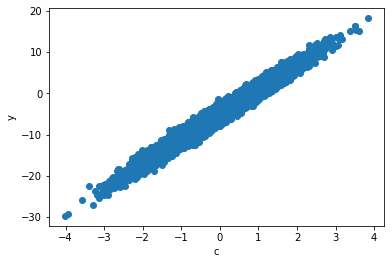

In [23]:
plt.xlabel('c')
plt.ylabel('y')
plt.scatter(x, y)

In [24]:
display_interval = 10

for step in range(steps):
    d_w, d_b = grad(x, y, W, B)
    weight_hat = d_w * learning_rate
    bias_hat = d_b * learning_rate
    
    W.assign_sub(weight_hat)
    B.assign_sub(bias_hat)
    loss_ = loss(x, y, W, B)
    
    if not step % display_interval:
        print(f'step: {step}, loss: {loss_}')
    
    

step: 0, loss: 67.36309814453125
step: 10, loss: 64.73764038085938
step: 20, loss: 62.21611404418945
step: 30, loss: 59.79439926147461
step: 40, loss: 57.46855163574219
step: 50, loss: 55.23476791381836
step: 60, loss: 53.08942413330078
step: 70, loss: 51.02899932861328
step: 80, loss: 49.05013656616211
step: 90, loss: 47.14960479736328
step: 100, loss: 45.32430648803711
step: 110, loss: 43.57126235961914
step: 120, loss: 41.887611389160156
step: 130, loss: 40.2706184387207
step: 140, loss: 38.717620849609375
step: 150, loss: 37.226104736328125
step: 160, loss: 35.79363250732422
step: 170, loss: 34.41787338256836
step: 180, loss: 33.096561431884766
step: 190, loss: 31.827556610107422
step: 200, loss: 30.60879135131836
step: 210, loss: 29.438255310058594
step: 220, loss: 28.314067840576172
step: 230, loss: 27.234378814697266
step: 240, loss: 26.19742774963379
step: 250, loss: 25.201522827148438
step: 260, loss: 24.245040893554688
step: 270, loss: 23.3264217376709
step: 280, loss: 22.444

Plot Output

Text(0.5, 1.0, 'Fit')

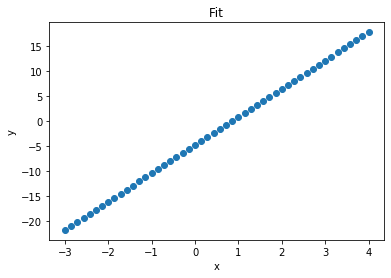

In [25]:
xs = np.linspace(-3, 4, 50)
ys = W.numpy() * xs + B.numpy()

plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fit')